In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wearable-tech-sleep-quality/wearable_tech_sleep_quality.csv


In [2]:
import pandas as pd

# Φόρτωση του dataset
df = pd.read_csv('/kaggle/input/wearable-tech-sleep-quality/wearable_tech_sleep_quality.csv')

# Προβολή των πρώτων γραμμών
print(df.head())




   Heart Rate  Body Temperature  Room Temperature  Humidity Sleep Stage
0          88                36                23        34       Light
1         101                36                28        59       Light
2          78                35                22        32         REM
3          64                37                22        46       Light
4          92                36                23        67       Light


In [3]:
# Επισκόπηση των στηλών και τύπων δεδομένων
print(df.info())

# Βασικά στατιστικά
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Heart Rate        5000 non-null   int64 
 1   Body Temperature  5000 non-null   int64 
 2   Room Temperature  5000 non-null   int64 
 3   Humidity          5000 non-null   int64 
 4   Sleep Stage       5000 non-null   object
dtypes: int64(4), object(1)
memory usage: 195.4+ KB
None
       Heart Rate  Body Temperature  Room Temperature     Humidity
count  5000.00000       5000.000000       5000.000000  5000.000000
mean     79.70120         35.987200         21.955200    54.627200
std      17.26688          0.706496          4.301545    14.450951
min      50.00000         35.000000         15.000000    30.000000
25%      65.00000         35.000000         18.000000    42.000000
50%      80.00000         36.000000         22.000000    55.000000
75%      95.00000         36.000000         26

In [4]:
df.tail()

,Heart Rate,Body Temperature,Room Temperature,Humidity,Sleep Stage
4995,52,36,27,55,Light
4996,77,36,26,56,REM
4997,55,37,19,55,Deep
4998,93,36,16,58,REM
4999,93,37,16,30,Deep


In [5]:
df.shape

(5000, 5)

In [6]:
# Πλήθος μοναδικών τιμών ανά στήλη
print(df.nunique())

Heart Rate          60
Body Temperature     3
Room Temperature    15
Humidity            50
Sleep Stage          4
dtype: int64


In [8]:
# Έλεγχος για NaN
print(df.isnull().sum())


Heart Rate          0
Body Temperature    0
Room Temperature    0
Humidity            0
Sleep Stage         0
dtype: int64


In [10]:
# Περιγραφικά στατιστικά
print(df.describe())

# Κατανομή διάρκειας ύπνου (αν υπάρχει τέτοια στήλη)
if 'sleep_duration' in df.columns:
    sns.histplot(df['sleep_duration'], kde=True)
    plt.title("Sleep Duration Distribution")
    plt.xlabel("Hours")
    plt.show()


       Heart Rate  Body Temperature  Room Temperature     Humidity
count  5000.00000       5000.000000       5000.000000  5000.000000
mean     79.70120         35.987200         21.955200    54.627200
std      17.26688          0.706496          4.301545    14.450951
min      50.00000         35.000000         15.000000    30.000000
25%      65.00000         35.000000         18.000000    42.000000
50%      80.00000         36.000000         22.000000    55.000000
75%      95.00000         36.000000         26.000000    67.000000
max     109.00000         37.000000         29.000000    79.000000


In [11]:
# Αφαίρεση outliers στην διάρκεια ύπνου (αν υπάρχει στήλη)
if 'sleep_duration' in df.columns:
    df = df[(df['sleep_duration'] >= 2) & (df['sleep_duration'] <= 15)]

# Αντικατάσταση NaN με μέσες τιμές για αριθμητικά πεδία
df.fillna(df.mean(numeric_only=True), inplace=True)


In [12]:
# Πχ. μετατροπή "Good", "Poor" κτλ σε αριθμούς
if 'sleep_quality' in df.columns:
    df['sleep_quality_encoded'] = df['sleep_quality'].map({
        'Poor': 0, 'Average': 1, 'Good': 2
    })


In [13]:
df.columns

Index(['Heart Rate', 'Body Temperature', 'Room Temperature', 'Humidity',
       'Sleep Stage'],
      dtype='object')

Heart Rate – Καρδιακός παλμός

Body Temperature – Θερμοκρασία σώματος

Room Temperature – Θερμοκρασία δωματίου

Humidity – Υγρασία

Sleep Stage – Φάση ύπνου (πιθανώς κατηγορική: REM, light, deep, awake κλπ.)



In [14]:
print(df['Sleep Stage'].value_counts())


Sleep Stage
REM      1291
Awake    1268
Light    1253
Deep     1188
Name: count, dtype: int64


In [15]:
# One-hot encoding ή label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sleep Stage Encoded'] = le.fit_transform(df['Sleep Stage'])


In [16]:
print(df.isnull().sum())

# Έλεγχος για outliers σε αριθμητικές στήλες
for col in ['Heart Rate', 'Body Temperature', 'Room Temperature', 'Humidity']:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}")


Heart Rate             0
Body Temperature       0
Room Temperature       0
Humidity               0
Sleep Stage            0
Sleep Stage Encoded    0
dtype: int64
Heart Rate: min=50, max=109
Body Temperature: min=35, max=37
Room Temperature: min=15, max=29
Humidity: min=30, max=79


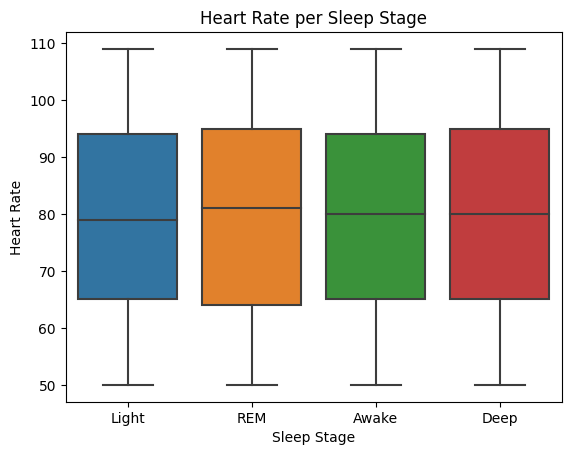

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Sleep Stage', y='Heart Rate')
plt.title("Heart Rate per Sleep Stage")
plt.show()


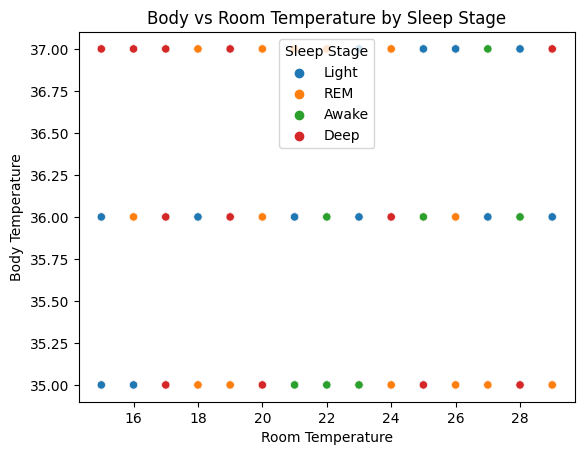

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Room Temperature', y='Body Temperature', hue='Sleep Stage')
plt.title("Body vs Room Temperature by Sleep Stage")
plt.show()


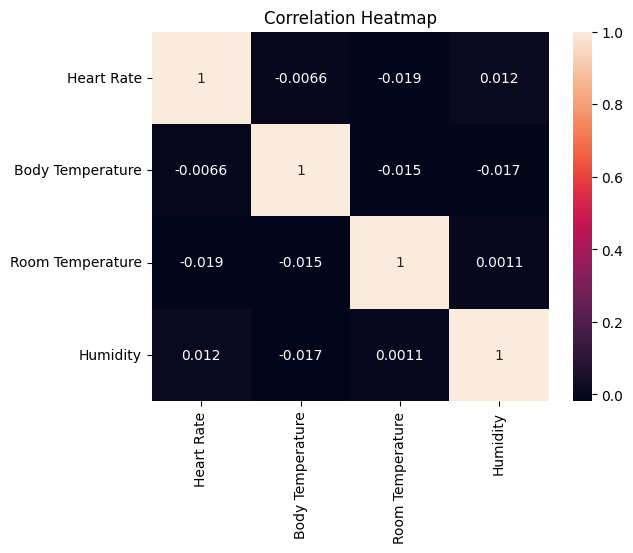

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[['Heart Rate', 'Body Temperature', 'Room Temperature', 'Humidity']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


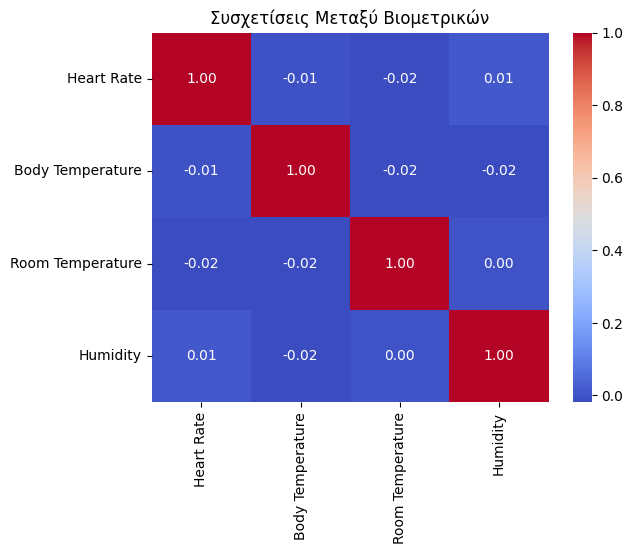

In [25]:
numeric_cols = ['Heart Rate', 'Body Temperature', 'Room Temperature', 'Humidity']
correlation = df[numeric_cols].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Συσχετίσεις Μεταξύ Βιομετρικών")
plt.show()


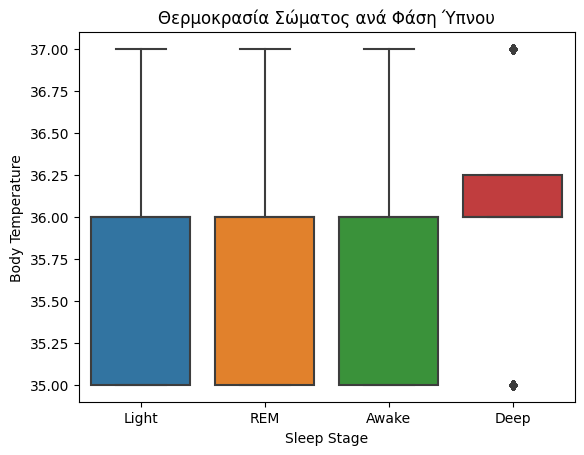

In [27]:
sns.boxplot(data=df, x='Sleep Stage', y='Body Temperature')
plt.title("Θερμοκρασία Σώματος ανά Φάση Ύπνου")
plt.show()


In [32]:
print(df.columns)


Index(['Heart Rate', 'Body Temperature', 'Room Temperature', 'Humidity',
       'Sleep Stage', 'Sleep Stage Encoded'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


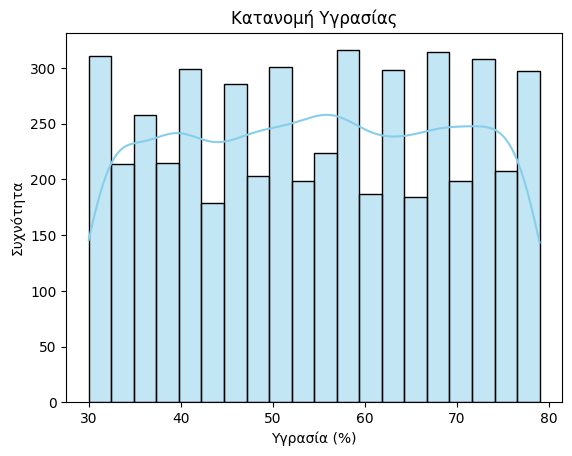

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Humidity', kde=True, bins=20, color='skyblue')
plt.title("Κατανομή Υγρασίας")
plt.xlabel("Υγρασία (%)")
plt.ylabel("Συχνότητα")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


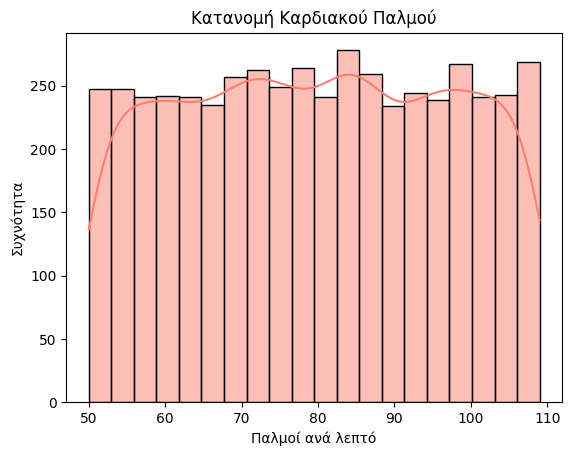

In [34]:
sns.histplot(data=df, x='Heart Rate', kde=True, bins=20, color='salmon')
plt.title("Κατανομή Καρδιακού Παλμού")
plt.xlabel("Παλμοί ανά λεπτό")
plt.ylabel("Συχνότητα")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

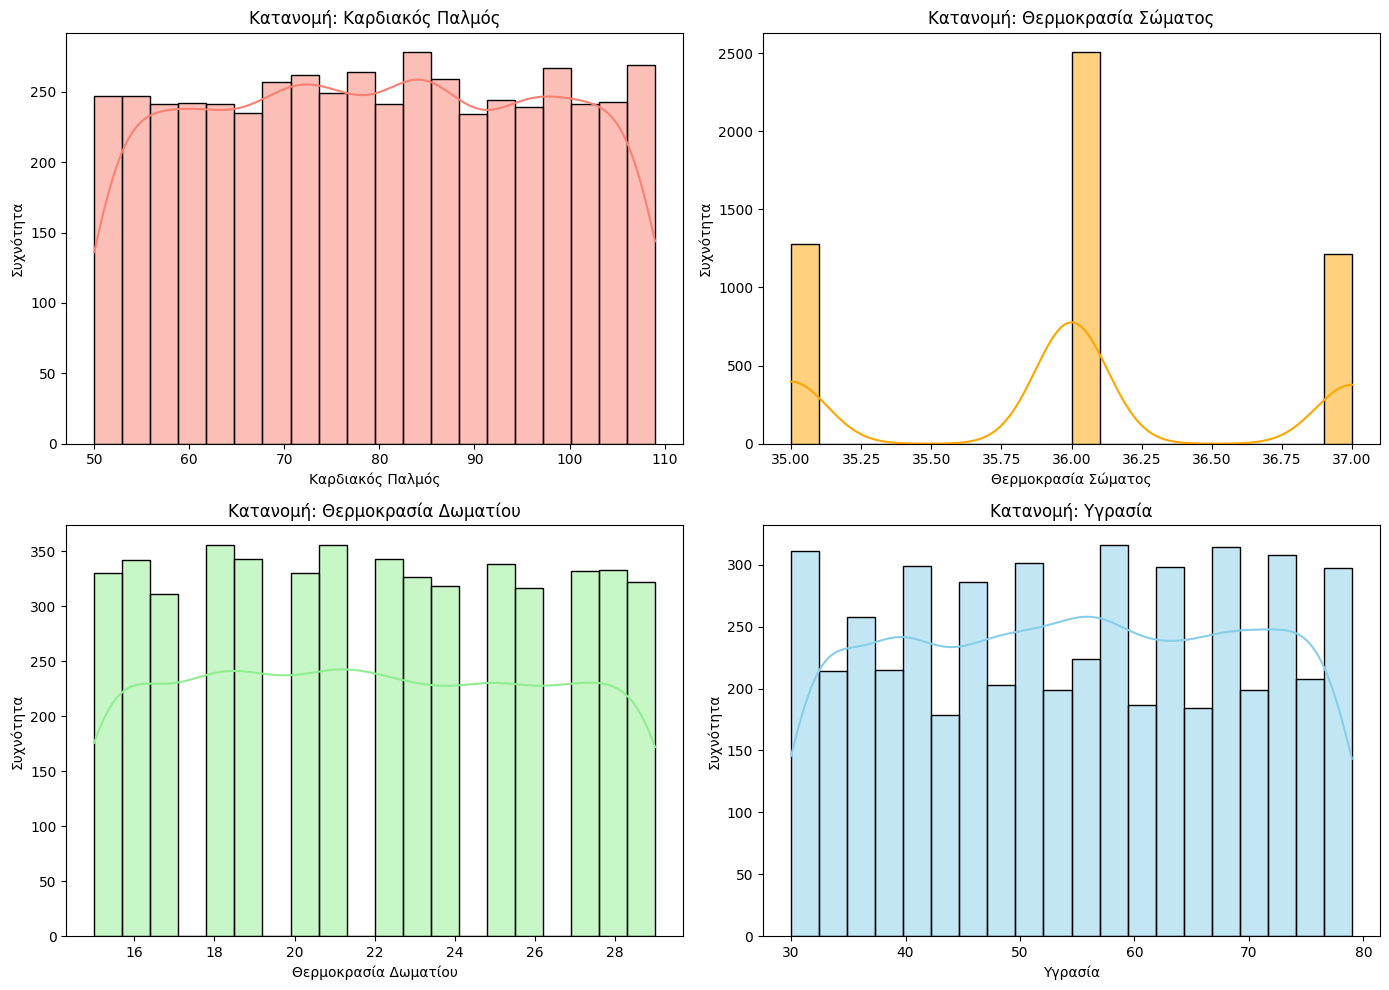

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ορισμός στήλης και τίτλων
columns = ['Heart Rate', 'Body Temperature', 'Room Temperature', 'Humidity']
titles = ['Καρδιακός Παλμός', 'Θερμοκρασία Σώματος', 'Θερμοκρασία Δωματίου', 'Υγρασία']
colors = ['salmon', 'orange', 'lightgreen', 'skyblue']

# Δημιουργία subplot 2x2
plt.figure(figsize=(14, 10))

for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col, kde=True, bins=20, color=colors[i])
    plt.title(f"Κατανομή: {titles[i]}")
    plt.xlabel(titles[i])
    plt.ylabel("Συχνότητα")

plt.tight_layout()
plt.show()


In [40]:
print(df['Sleep Quality'].unique())  # Δες τις μοναδικές τιμές της στήλης


[1 0]


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/wearable-tech-sleep-quality/wearable_tech_sleep_quality.csv')

# Now you can access the columns
print(df.columns)


Index(['Heart Rate', 'Body Temperature', 'Room Temperature', 'Humidity',
       'Sleep Stage'],
      dtype='object')


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Χαρακτηριστικά και ετικέτες
X = df.drop('Sleep Stage', axis=1)
y = df['Sleep Stage']

# Διάσπαση σε train και test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Κανονικοποίηση
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Ορισμός μοντέλων
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC()
}

# Εκπαίδευση και αξιολόγηση
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'--- {name} ---')
    print(classification_report(y_test, y_pred))


--- KNN ---
              precision    recall  f1-score   support

       Awake       0.24      0.32      0.28       245
        Deep       0.22      0.28      0.25       226
       Light       0.30      0.26      0.28       257
         REM       0.25      0.16      0.20       272

    accuracy                           0.25      1000
   macro avg       0.26      0.26      0.25      1000
weighted avg       0.26      0.25      0.25      1000

--- Random Forest ---
              precision    recall  f1-score   support

       Awake       0.24      0.27      0.25       245
        Deep       0.19      0.20      0.20       226
       Light       0.27      0.23      0.25       257
         REM       0.24      0.23      0.23       272

    accuracy                           0.23      1000
   macro avg       0.23      0.23      0.23      1000
weighted avg       0.24      0.23      0.23      1000

--- Logistic Regression ---
              precision    recall  f1-score   support

       Awake 

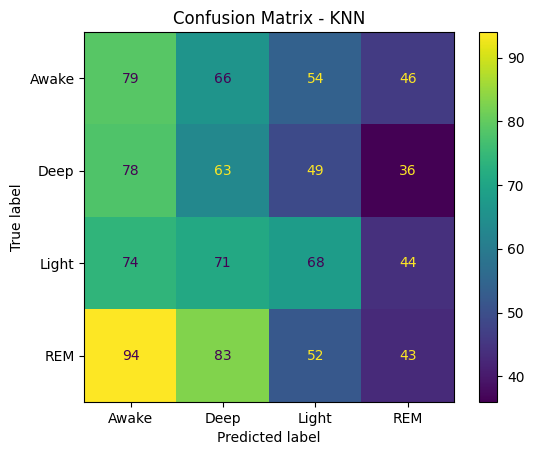

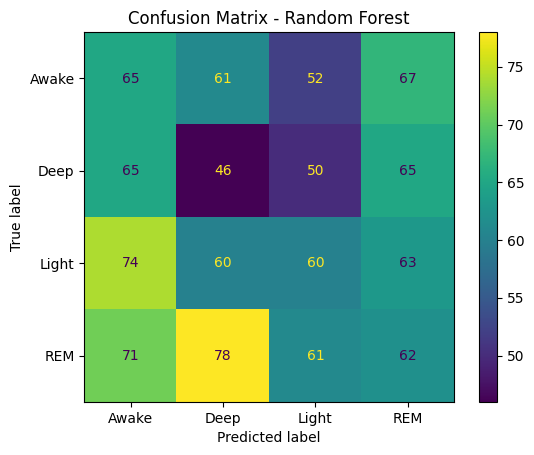

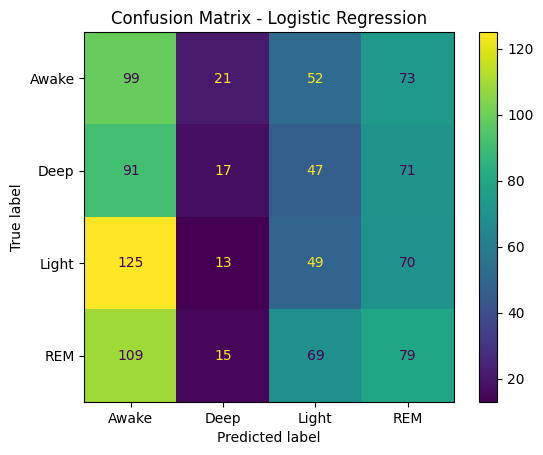

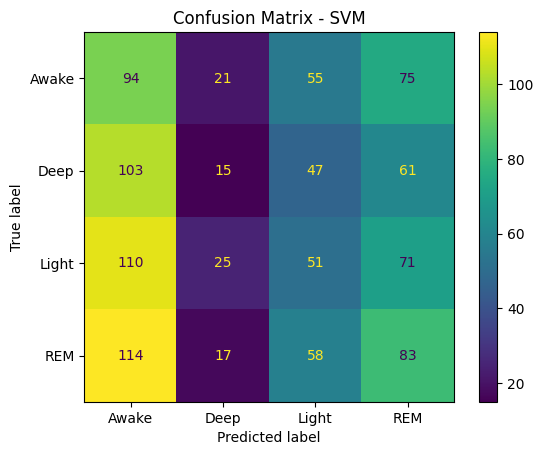

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in models.items():
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()



✅ Best RF Parameters: {'max_depth': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

       Awake       0.24      0.34      0.28       245
        Deep       0.23      0.20      0.21       226
       Light       0.29      0.23      0.26       257
         REM       0.27      0.25      0.26       272

    accuracy                           0.26      1000
   macro avg       0.26      0.26      0.25      1000
weighted avg       0.26      0.26      0.25      1000



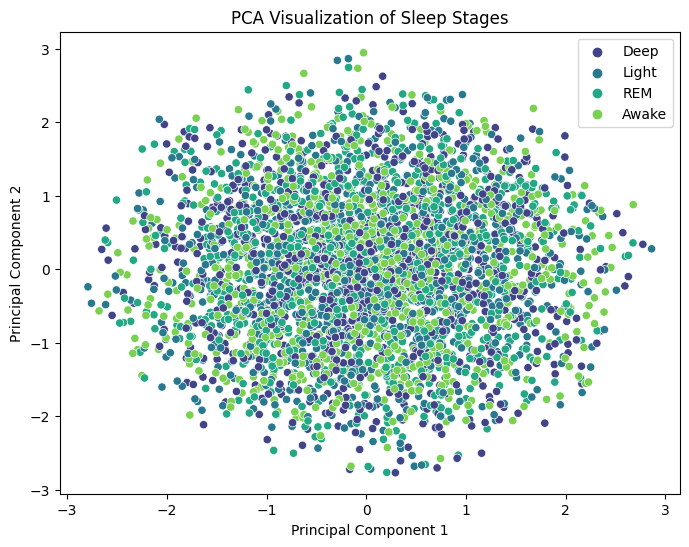

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#  GridSearchCV για Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train_scaled, y_train)
print(f'\n✅ Best RF Parameters: {grid_rf.best_params_}')
print(classification_report(y_test, grid_rf.predict(X_test_scaled)))

#  PCA για 2D Οπτικοποίηση
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train, palette='viridis')
plt.title('PCA Visualization of Sleep Stages')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [21]:
from sklearn.preprocessing import LabelEncoder

# Κωδικοποίηση
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)



🔍 Training KNN...
              precision    recall  f1-score   support

       Awake       0.25      0.36      0.29       245
        Deep       0.20      0.23      0.22       226
       Light       0.30      0.22      0.25       257
         REM       0.26      0.19      0.22       272

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.25      0.25      0.25      1000



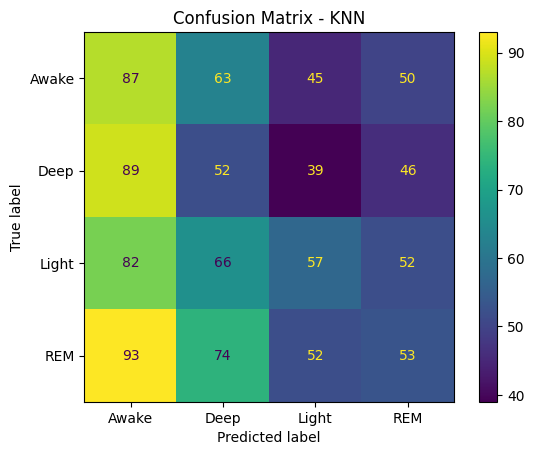


🔍 Training Random Forest...
              precision    recall  f1-score   support

       Awake       0.24      0.34      0.28       245
        Deep       0.23      0.20      0.21       226
       Light       0.29      0.23      0.26       257
         REM       0.27      0.25      0.26       272

    accuracy                           0.26      1000
   macro avg       0.26      0.26      0.25      1000
weighted avg       0.26      0.26      0.25      1000



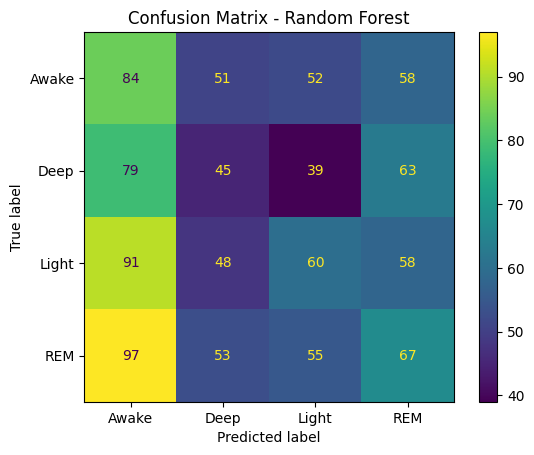


🔍 Training Logistic Regression...
              precision    recall  f1-score   support

       Awake       0.23      0.40      0.30       245
        Deep       0.26      0.08      0.12       226
       Light       0.23      0.19      0.21       257
         REM       0.27      0.29      0.28       272

    accuracy                           0.24      1000
   macro avg       0.25      0.24      0.22      1000
weighted avg       0.25      0.24      0.23      1000



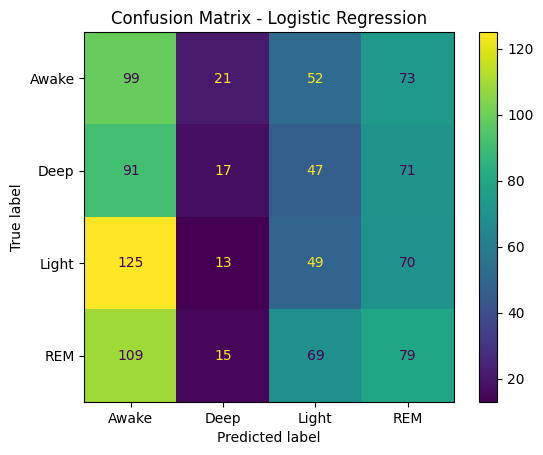


🔍 Training SVM...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Awake       0.24      0.47      0.32       245
        Deep       0.00      0.00      0.00       226
       Light       0.23      0.21      0.22       257
         REM       0.28      0.29      0.29       272

    accuracy                           0.25      1000
   macro avg       0.19      0.24      0.21      1000
weighted avg       0.19      0.25      0.21      1000



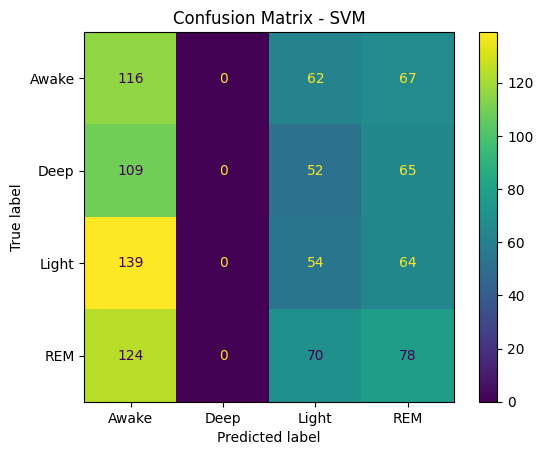


🔍 Training XGBoost...
              precision    recall  f1-score   support

       Awake       0.21      0.29      0.25       245
        Deep       0.20      0.16      0.18       226
       Light       0.24      0.20      0.22       257
         REM       0.27      0.27      0.27       272

    accuracy                           0.23      1000
   macro avg       0.23      0.23      0.23      1000
weighted avg       0.23      0.23      0.23      1000



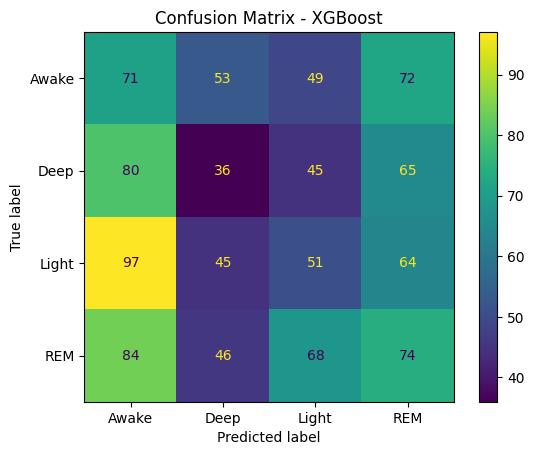

In [22]:
for name, mp in model_params.items():
    print(f"\n🔍 Training {name}...")

    clf = GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1)

    if name == 'XGBoost':
        clf.fit(X_train_scaled, y_train_enc)
        score = clf.score(X_test_scaled, y_test_enc)
        best_models[name] = clf.best_estimator_
        y_test_pred = clf.predict(X_test_scaled)
        y_test_str = le.inverse_transform(y_test_pred)
        y_true_str = le.inverse_transform(y_test_enc)
    else:
        clf.fit(X_train_scaled, y_train)
        score = clf.score(X_test_scaled, y_test)
        best_models[name] = clf.best_estimator_
        y_test_str = clf.predict(X_test_scaled)
        y_true_str = y_test

    # Αποθήκευση score + report
    results.append({
        'Model': name,
        'Best Params': clf.best_params_,
        'Test Accuracy': score
    })

    print(classification_report(y_true_str, y_test_str))
    ConfusionMatrixDisplay.from_predictions(y_true_str, y_test_str)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


In [24]:
import pandas as pd

results_df = pd.DataFrame(results)
best_model_name = results_df.sort_values(by='Test Accuracy', ascending=False)['Model'].iloc[0]
print("Best model:", best_model_name)


Best model: Random Forest


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


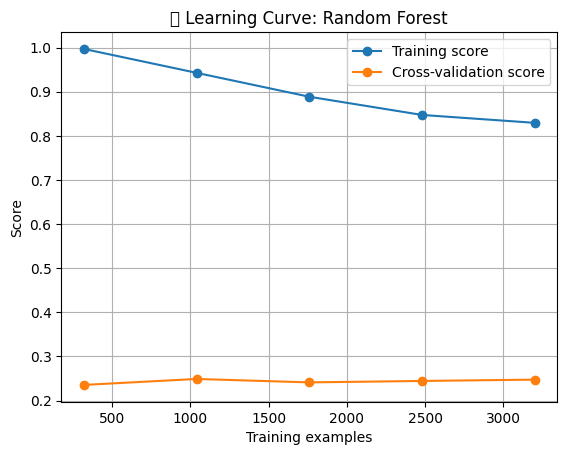

In [25]:
plot_learning_curve(
    best_models[best_model_name],
    X_train_scaled,
    y_train,  # ή y_train_enc αν είναι encoded
    title=best_model_name
)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


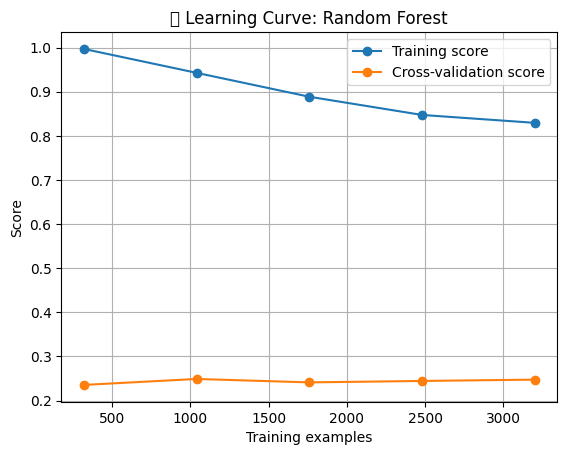

In [26]:
if best_model_name == "XGBoost":
    plot_learning_curve(best_models[best_model_name], X_train_scaled, y_train_enc, best_model_name)
else:
    plot_learning_curve(best_models[best_model_name], X_train_scaled, y_train, best_model_name)


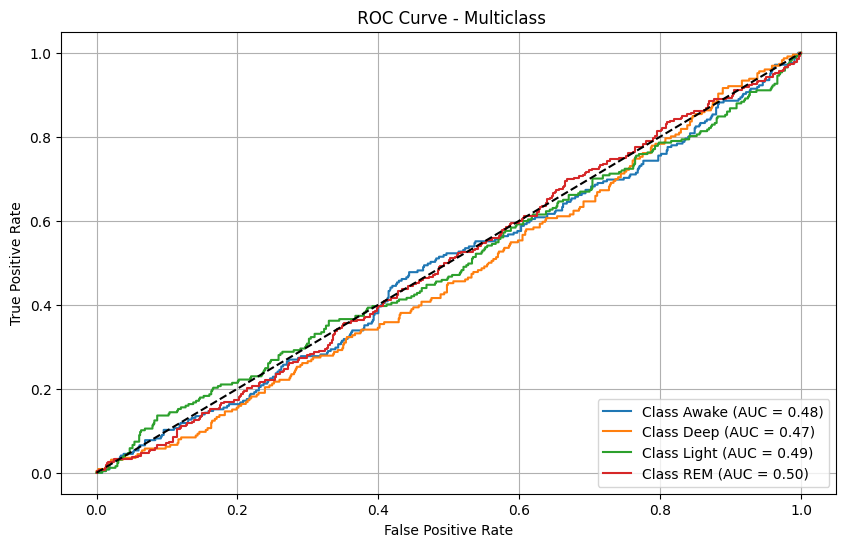

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder

# Χρειάζεται label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# Binarization
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_encoded))
n_classes = y_test_bin.shape[1]

# Wrap σε OneVsRest
model_roc = OneVsRestClassifier(best_models[best_model_name])
y_score = model_roc.fit(X_train_scaled, y_train_encoded).predict_proba(X_test_scaled)

# ROC Curve per class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title(' ROC Curve - Multiclass')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


 99%|===================| 3961/4000 [00:54<00:00]        The figure layout has changed to tight
The figure layout has changed to tight


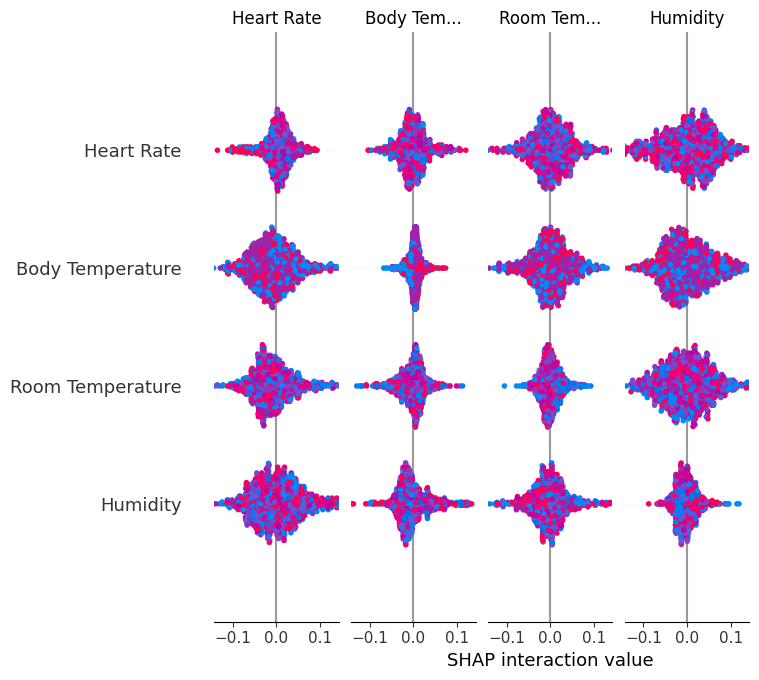

In [31]:
import shap



# Για Tree-based (π.χ. Random Forest ή XGBoost)
explainer = shap.Explainer(best_models[best_model_name], X_train_scaled)
shap_values = explainer(X_test_scaled, check_additivity=False)

# Πιο σημαντικά χαρακτηριστικά
shap.summary_plot(shap_values, X_test, feature_names=X.columns)



In [33]:
!pip install --upgrade scikit-learn imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 76.6 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [35]:
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 76.0 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

print(f"Before SMOTE: {y_train.value_counts().to_dict()}")
print(f"After SMOTE: {pd.Series(y_res).value_counts().to_dict()}")


Before SMOTE: {'Awake': 1023, 'REM': 1019, 'Light': 996, 'Deep': 962}
After SMOTE: {'Deep': 1023, 'Light': 1023, 'REM': 1023, 'Awake': 1023}
